In [6]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt

In [12]:
movie = pd.read_csv("my_movies.csv")
movie1 = movie.iloc[ : ,5:]
# #use apriori algorithm to get all rules for the data..

movie1_a = apriori(movie1 , min_support = 0.008 ,  max_len = 4 , use_colnames = True)

# Most Frequent item sets based on support 
movie1_a.sort_values('support', ascending = False, inplace = True)
movie1_a.head(10)

,support,itemsets
1,0.7,(Gladiator)
0,0.6,(Sixth Sense)
4,0.6,(Patriot)
17,0.6,"(Gladiator, Patriot)"
10,0.5,"(Gladiator, Sixth Sense)"
30,0.4,"(Gladiator, Sixth Sense, Patriot)"
13,0.4,"(Patriot, Sixth Sense)"
9,0.2,(Green Mile)
22,0.2,"(LOTR2, LOTR1)"
16,0.2,"(Green Mile, Sixth Sense)"


<ipython-input-14-627720047275>:2: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.bar(x = list(range(0, 11)), height = movie1_a.support[0:11], color ='rgmykb');plt.xticks(list(range(0, 11)), movie1_a.itemsets[0:11], rotation=20)


([<matplotlib.axis.XTick at 0x1a025823610>,
 [Text(0, 0, "frozenset({'Gladiator'})"),
  Text(1, 0, "frozenset({'Sixth Sense'})"),
  Text(2, 0, "frozenset({'Patriot'})"),
  Text(3, 0, "frozenset({'Gladiator', 'Patriot'})"),
  Text(4, 0, "frozenset({'Gladiator', 'Sixth Sense'})"),
  Text(5, 0, "frozenset({'Gladiator', 'Sixth Sense', 'Patriot'})"),
  Text(6, 0, "frozenset({'Patriot', 'Sixth Sense'})"),
  Text(7, 0, "frozenset({'Green Mile'})"),
  Text(8, 0, "frozenset({'LOTR2', 'LOTR1'})"),
  Text(9, 0, "frozenset({'Green Mile', 'Sixth Sense'})"),
  Text(10, 0, "frozenset({'LOTR1'})")])

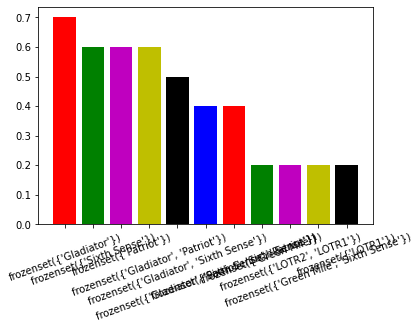

In [14]:
#plotting barplot for visualizatin of the data regarding their support.
plt.bar(x = list(range(0, 11)), height = movie1_a.support[0:11], color ='rgmykb');plt.xticks(list(range(0, 11)), movie1_a.itemsets[0:11], rotation=20)

In [15]:
#get the most frequent pair as per their lift by using association rule function.
rules = association_rules(movie1_a, metric = "lift", min_threshold = 1)
rules.head(20)
rules.sort_values('lift', ascending = False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
108,"(Green Mile, LOTR2)","(Sixth Sense, Harry Potter1)",0.1,0.1,0.1,1.0,10.0,0.09,inf
146,"(Gladiator, Green Mile, Sixth Sense)",(LOTR),0.1,0.1,0.1,1.0,10.0,0.09,inf
111,"(Sixth Sense, LOTR2)","(Green Mile, Harry Potter1)",0.1,0.1,0.1,1.0,10.0,0.09,inf
35,"(Harry Potter1, LOTR1)","(Sixth Sense, LOTR2)",0.1,0.1,0.1,1.0,10.0,0.09,inf
155,"(Sixth Sense, LOTR)","(Gladiator, Green Mile)",0.1,0.1,0.1,1.0,10.0,0.09,inf
109,"(Sixth Sense, Harry Potter1)","(Green Mile, LOTR2)",0.1,0.1,0.1,1.0,10.0,0.09,inf
159,(LOTR),"(Gladiator, Green Mile, Sixth Sense)",0.1,0.1,0.1,1.0,10.0,0.09,inf
36,"(Harry Potter1, LOTR2)","(Sixth Sense, LOTR1)",0.1,0.1,0.1,1.0,10.0,0.09,inf
25,"(Sixth Sense, LOTR1)","(Green Mile, Harry Potter1)",0.1,0.1,0.1,1.0,10.0,0.09,inf
37,"(Sixth Sense, LOTR1)","(Harry Potter1, LOTR2)",0.1,0.1,0.1,1.0,10.0,0.09,inf


In [16]:
def to_list(i):
    return (sorted(list(i)))

ma_X = rules.antecedents.apply(to_list) + rules.consequents.apply(to_list)

ma_X = ma_X.apply(sorted)

rules_sets = list(ma_X)

unique_rules_sets = [list(m) for m in set(tuple(i) for i in rules_sets)]

In [17]:
index_rules = []

for i in unique_rules_sets:
    index_rules.append(rules_sets.index(i))

# getting rules without any redudancy 
rules_no_redudancy = rules.iloc[index_rules, :]

# Sorting them with respect to list and getting top 10 rules 
rules_no_redudancy.sort_values('lift', ascending = False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
84,"(Gladiator, Green Mile)",(LOTR),0.1,0.1,0.1,1.0,10.0,0.09,inf
146,"(Gladiator, Green Mile, Sixth Sense)",(LOTR),0.1,0.1,0.1,1.0,10.0,0.09,inf
180,(Green Mile),(LOTR),0.2,0.1,0.1,0.5,5.0,0.08,1.8
44,"(Sixth Sense, LOTR2)",(LOTR1),0.1,0.2,0.1,1.0,5.0,0.08,inf
160,"(Sixth Sense, Harry Potter1)",(LOTR1),0.1,0.2,0.1,1.0,5.0,0.08,inf
30,"(Sixth Sense, Harry Potter1, LOTR1)",(LOTR2),0.1,0.2,0.1,1.0,5.0,0.08,inf
12,(LOTR2),(LOTR1),0.2,0.2,0.2,1.0,5.0,0.16,inf
194,"(Green Mile, Harry Potter1, LOTR2)",(LOTR1),0.1,0.2,0.1,1.0,5.0,0.08,inf
188,(Harry Potter1),(Harry Potter2),0.2,0.1,0.1,0.5,5.0,0.08,1.8
90,"(Harry Potter1, LOTR2)",(LOTR1),0.1,0.2,0.1,1.0,5.0,0.08,inf
